# Explore 

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prep
import statsmodels.api as sm


plt.rc('figure', figsize=(12, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=14)

# Store Item Demand

In [2]:
# Get our dataframe for store items and rename sale_amount to quanity
store = prep.prep_zach()
store.rename(columns={'sale_amount':"quantity"}, inplace=True)

print('Date Range:', store.index.min(), 'to', store.index.max())
print('Shape:', store.shape)

store.head(10)

Date Range: 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Shape: (913000, 18)


,item,quantity,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,day,month,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,Tuesday,1,10.92
2013-01-02 00:00:00+00:00,1,11.0,2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,Wednesday,1,9.24
2013-01-03 00:00:00+00:00,1,14.0,3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,Thursday,1,11.76
2013-01-04 00:00:00+00:00,1,13.0,4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,Friday,1,10.92
2013-01-05 00:00:00+00:00,1,10.0,5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,Saturday,1,8.40
2013-01-06 00:00:00+00:00,1,12.0,6,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,Sunday,1,10.08
2013-01-07 00:00:00+00:00,1,10.0,7,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,Monday,1,8.40
2013-01-08 00:00:00+00:00,1,9.0,8,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,Tuesday,1,7.56
2013-01-09 00:00:00+00:00,1,12.0,9,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,Wednesday,1,10.08


In [3]:
# split the data into train and test sets by using 2017 as the test year
train = store.iloc[store.index.year < 2017] 
test = store.iloc[store.index.year == 2017]
print(train.shape)
print(test.shape)

(730500, 18)
(182500, 18)


[Text(0.5, 1.0, 'Average Sales Revenue by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Revenue ($)')]

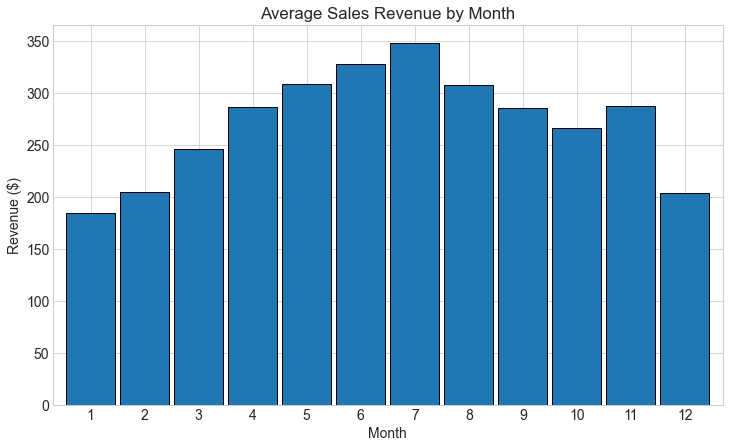

In [4]:
ax = train['sales_total'].groupby(train.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales Revenue by Month', xlabel='Month', ylabel='Revenue ($)')

In [5]:
train['sales_total'].groupby(train.index.year).sum()

sale_date
2013    4.269888e+07
2014    4.911278e+07
2015    5.127730e+07
2016    5.567467e+07
Name: sales_total, dtype: float64

[Text(0.5, 1.0, 'Yearly Revenue'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Revenue ($)')]

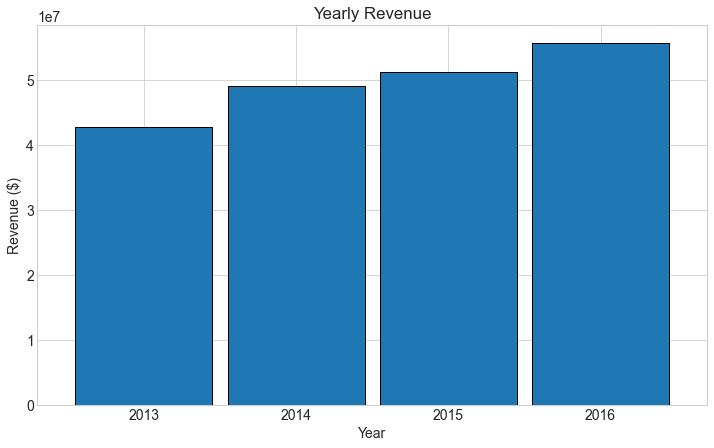

In [6]:
ax = train['sales_total'].groupby(train.index.year).sum().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Yearly Revenue', xlabel='Year', ylabel='Revenue ($)')

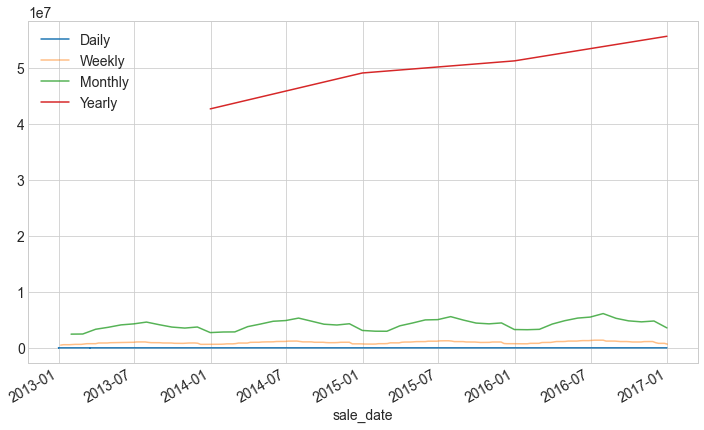

In [7]:
#aggregate on sales_total
train['sales_total'].plot(label='Daily')
train['sales_total'].resample('W').sum().plot(alpha=.5, label='Weekly')
train['sales_total'].resample('M').sum().plot(alpha=.8, label='Monthly')
train['sales_total'].resample('Y').sum().plot(label='Yearly')
plt.legend()

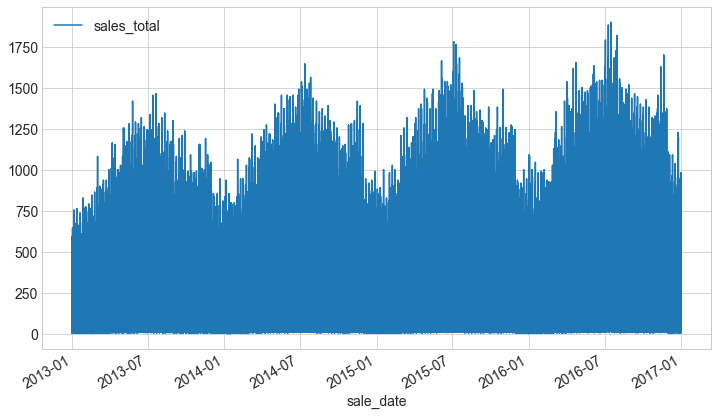

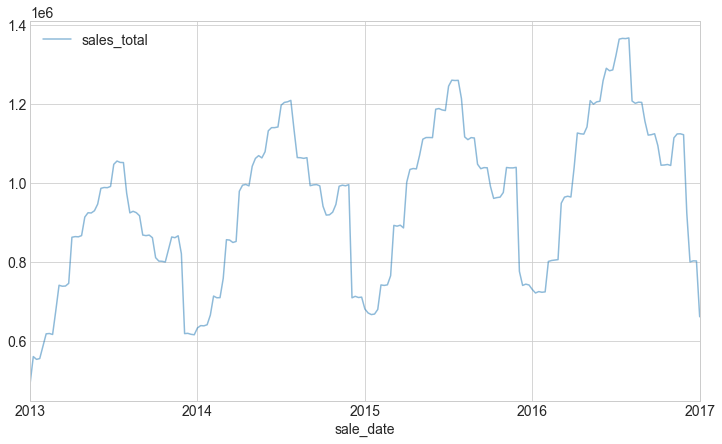

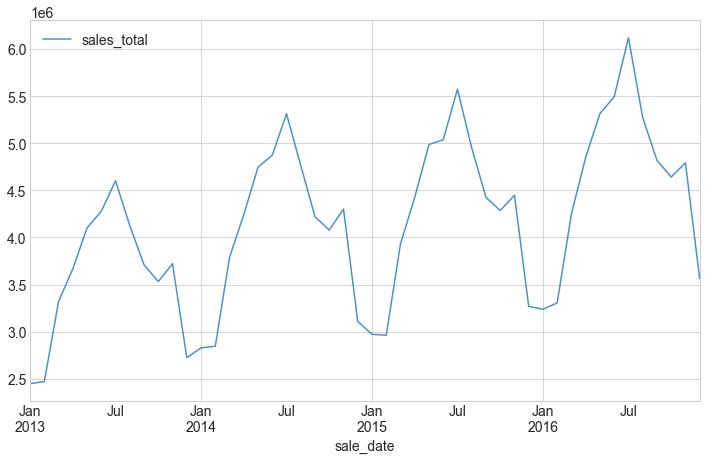

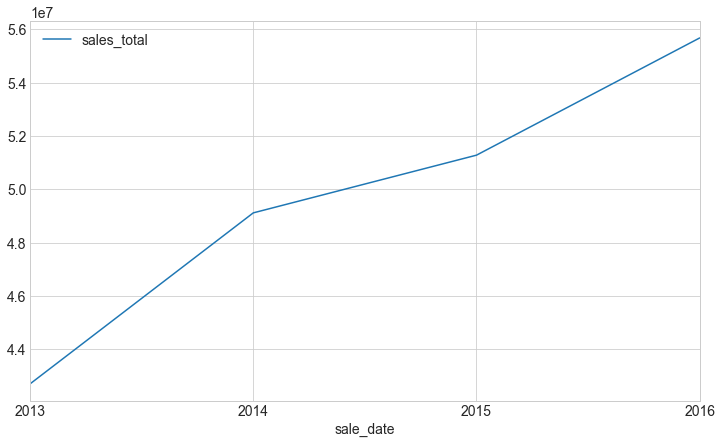

In [8]:
train[['sales_total']].plot(label='Daily')
train[['sales_total']].resample('W').sum().plot(alpha=.5, label='Weekly')
train[['sales_total']].resample('M').sum().plot(alpha=.8, label='Monthly')
train[['sales_total']].resample('Y').sum().plot(label='Yearly')
plt.legend()

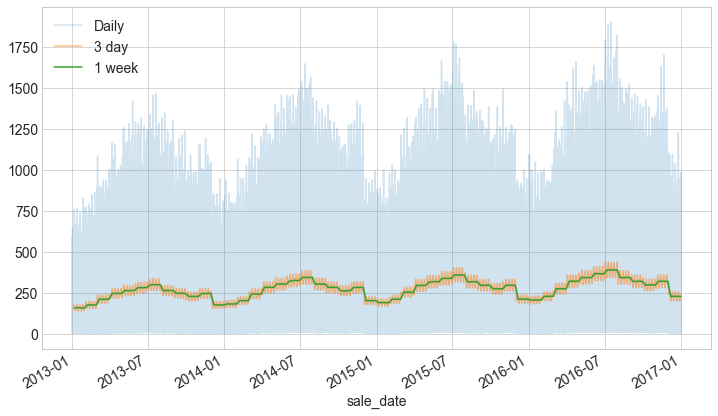

In [9]:
# Daily rolling averages
train['sales_total'].plot(alpha=.2, label='Daily')
train['sales_total'].resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
train['sales_total'].resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend()

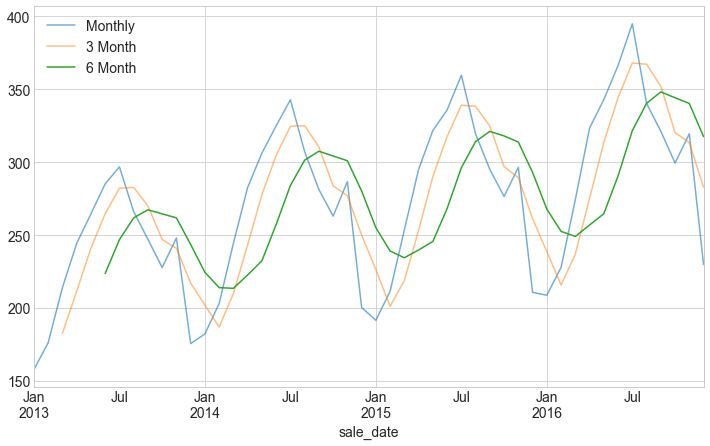

In [10]:
# Monthly rolling averages
train['sales_total'].resample('M').mean().plot(alpha=.6, label='Monthly')
train['sales_total'].resample('M').mean().rolling(3).mean().plot(alpha=.5, label='3 Month')
train['sales_total'].resample('M').mean().rolling(6).mean().plot(alpha=8, label='6 Month')
plt.legend()

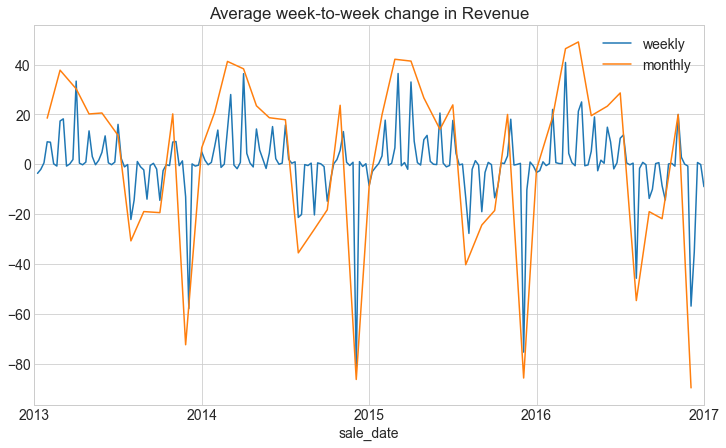

In [11]:
# Weekly change in sales revenue
train['sales_total'].resample('W').mean().diff().plot(title='Average week-to-week change in Revenue')
train['sales_total'].resample('M').mean().diff().plot(title='Average week-to-week change in Revenue')
plt.legend(['weekly', 'monthly'])

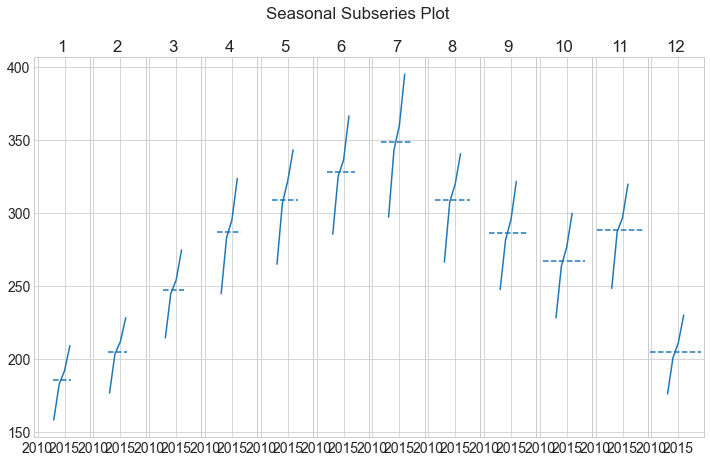

In [12]:
table = train['sales_total'].groupby([train.index.year, train.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), ls='--')
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)


<AxesSubplot:xlabel='this_week', ylabel='4_weeks_out'>

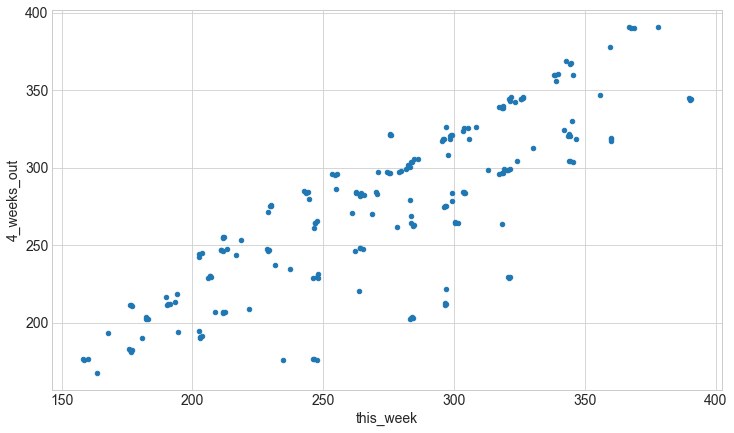

In [13]:
weekly = train[['sales_total']].resample('W').mean()
weekly['4_weeks_out'] = weekly.sales_total.shift(-4)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='4_weeks_out')


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

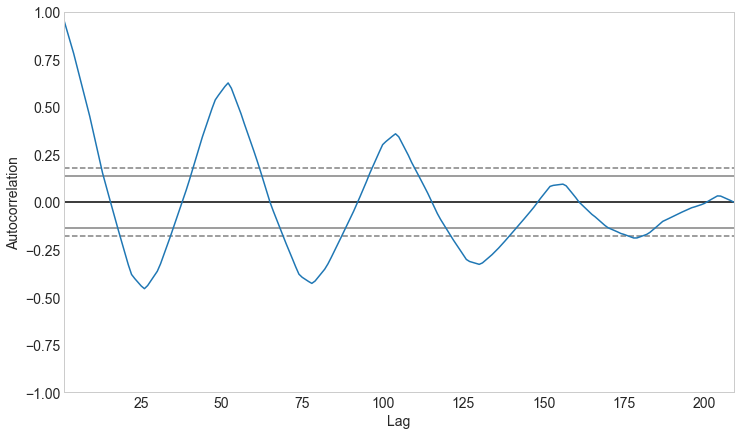

In [14]:
#Test for seaonality using autocorrelation
pd.plotting.autocorrelation_plot(train['sales_total'].resample('w').mean())

<AxesSubplot:xlabel='sale_date'>

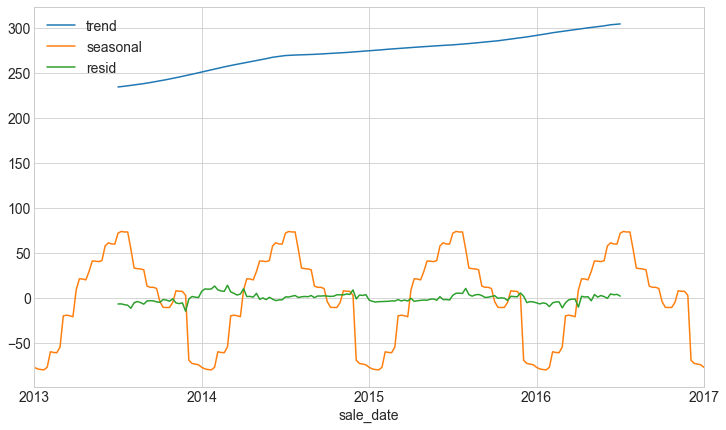

In [15]:
y = train['sales_total'].resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})

decomposition.iloc[:, 1:].plot()

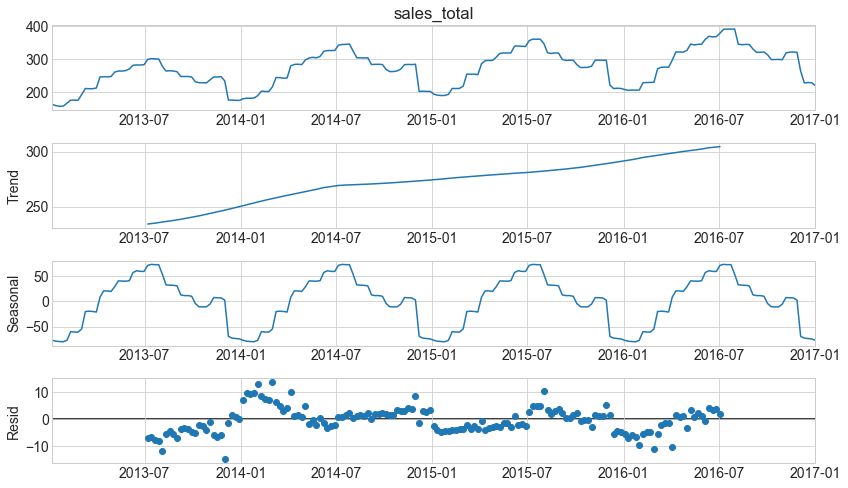

In [16]:
result.plot()
None


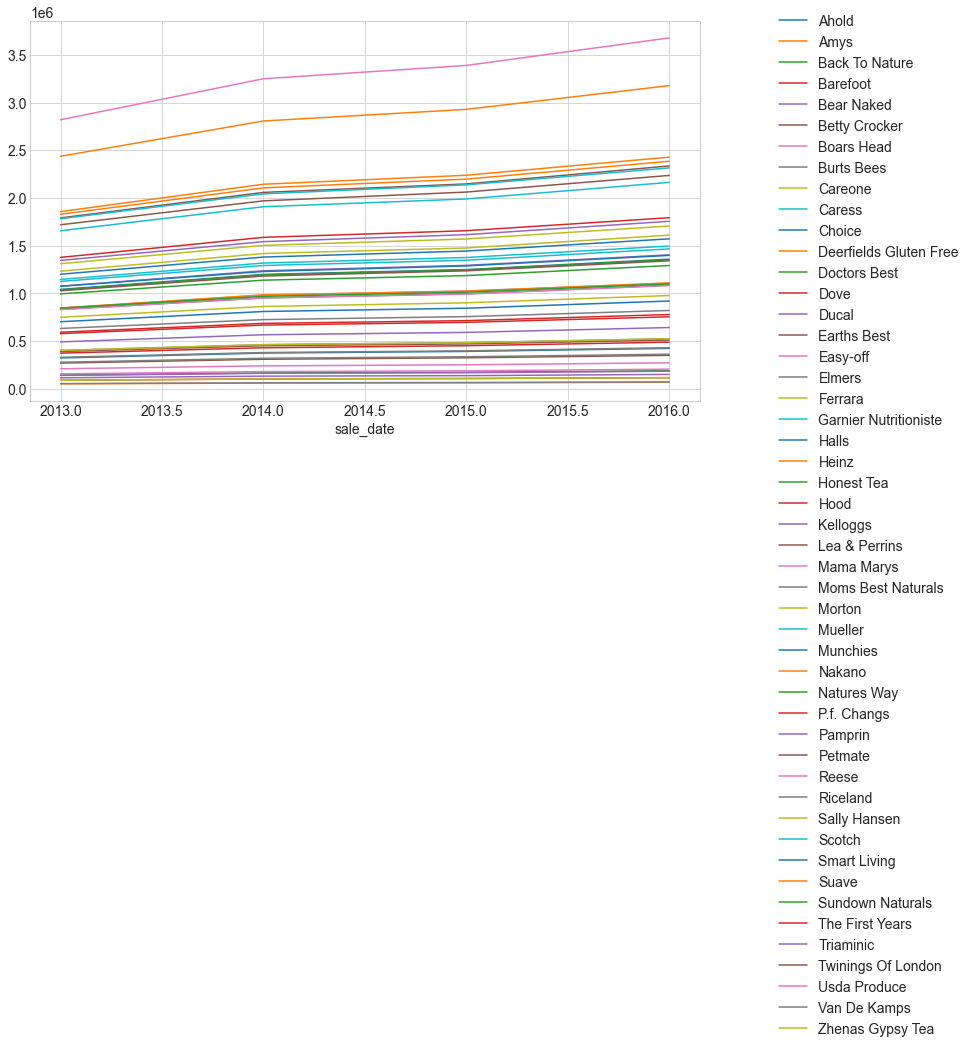

In [17]:
# Look at brand sales overtime
label = train['item_brand'].sort_values().unique()
ax = train[['sales_total', 'item_brand']].groupby([train.index.year, 'item_brand']).sum().unstack().plot()
ax.legend(label, bbox_to_anchor=(1.1, 1.05))

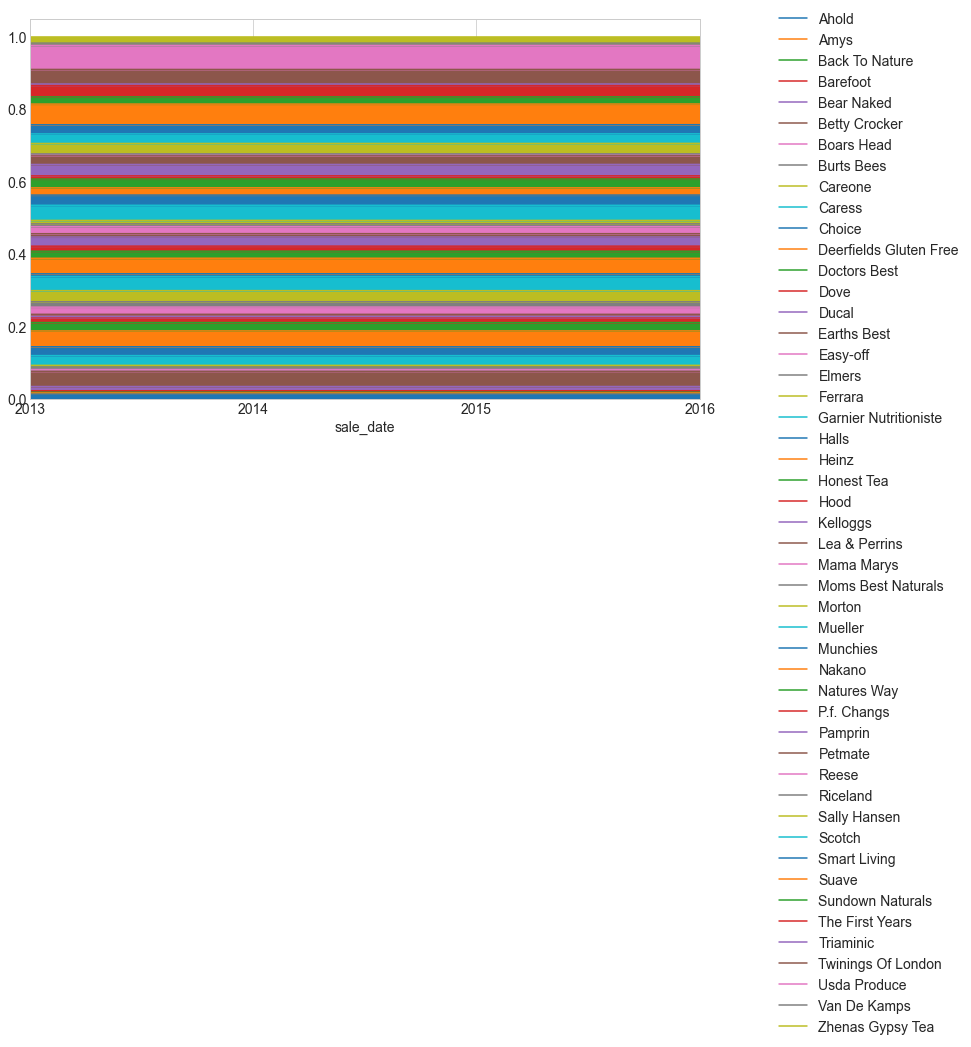

In [18]:
(train[['sales_total', 'item_brand']]
 .groupby('item_brand')
 .resample('Y')
 .sum()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.legend(label, bbox_to_anchor=(1.1, 1.05))

In [19]:
# Creat item bins based on item sale price: inexpensive,  moderately priced, expensive
# create a categorical feature
train['price_bin'] = pd.qcut(train.item_price, 3, labels=['inexpensive',  'moderate', 'expensive'])
train[['sales_total', 'price_bin']].groupby('price_bin').mean()

<ipython-input-19-e552266e850d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['price_bin'] = pd.qcut(train.item_price, 3, labels=['inexpensive',  'moderate', 'expensive'])


,sales_total
price_bin,
inexpensive,94.928192
moderate,290.573366
expensive,440.693895


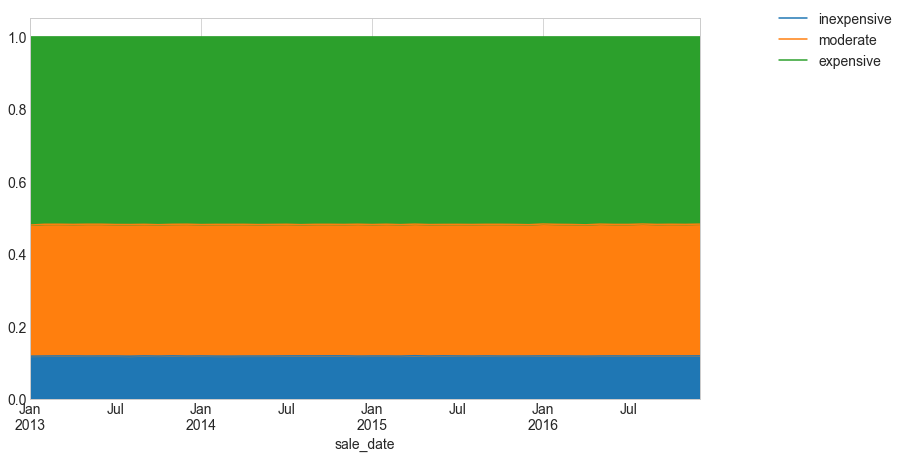

In [20]:
labels=['inexpensive',  'moderate', 'expensive']
(train[['sales_total', 'price_bin']]
 .groupby('price_bin')
 .resample('M')
 .sum()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.legend(labels, bbox_to_anchor=(1.1, 1.05))

# Germany Energy

In [21]:
#get the germnay Energy Data
despark = prep.prep_ops()
despark

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,1,2006
2006-01-02,1380.52100,0.000,0.000,0.000,1,2006
2006-01-03,1442.53300,0.000,0.000,0.000,1,2006
2006-01-04,1457.21700,0.000,0.000,0.000,1,2006
2006-01-05,1477.13100,0.000,0.000,0.000,1,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12,2017
2017-12-28,1299.86398,506.424,14.162,520.586,12,2017
2017-12-29,1295.08753,584.277,29.854,614.131,12,2017


In [22]:
despark['other'] = despark['Consumption'] - despark['Wind+Solar']
despark

,Consumption,Wind,Solar,Wind+Solar,month,year,other
Date,,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,1,2006,1069.18400
2006-01-02,1380.52100,0.000,0.000,0.000,1,2006,1380.52100
2006-01-03,1442.53300,0.000,0.000,0.000,1,2006,1442.53300
2006-01-04,1457.21700,0.000,0.000,0.000,1,2006,1457.21700
2006-01-05,1477.13100,0.000,0.000,0.000,1,2006,1477.13100
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12,2017,852.90391
2017-12-28,1299.86398,506.424,14.162,520.586,12,2017,779.27798
2017-12-29,1295.08753,584.277,29.854,614.131,12,2017,680.95653


array([[<AxesSubplot:title={'center':'Consumption'}>,
        <AxesSubplot:title={'center':'Wind'}>],
       [<AxesSubplot:title={'center':'Solar'}>,
        <AxesSubplot:title={'center':'Wind+Solar'}>],
       [<AxesSubplot:title={'center':'other'}>, <AxesSubplot:>]],
      dtype=object)

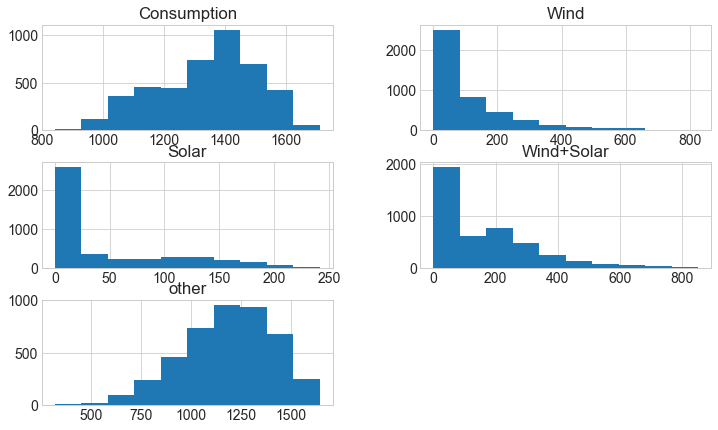

In [23]:
despark[['Consumption', 'Wind', 'Solar', 'Wind+Solar', 'other']].hist()

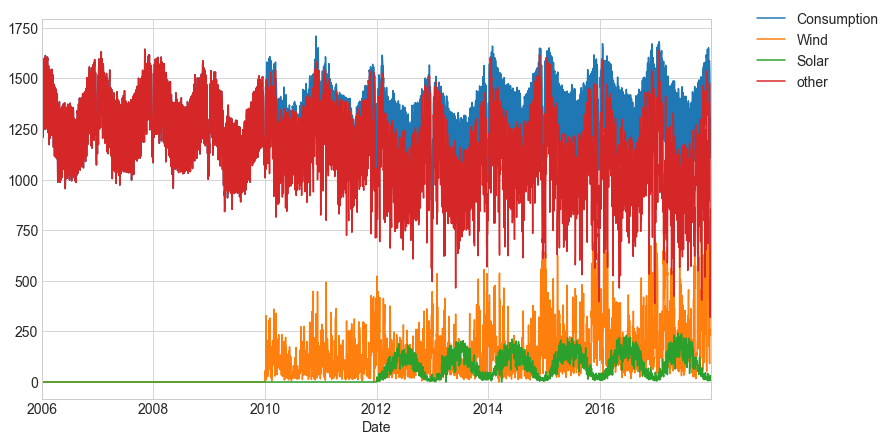

In [24]:
despark[['Consumption', 'Wind', 'Solar', 'other']].plot()
plt.legend(bbox_to_anchor=(1.05, 1.05))

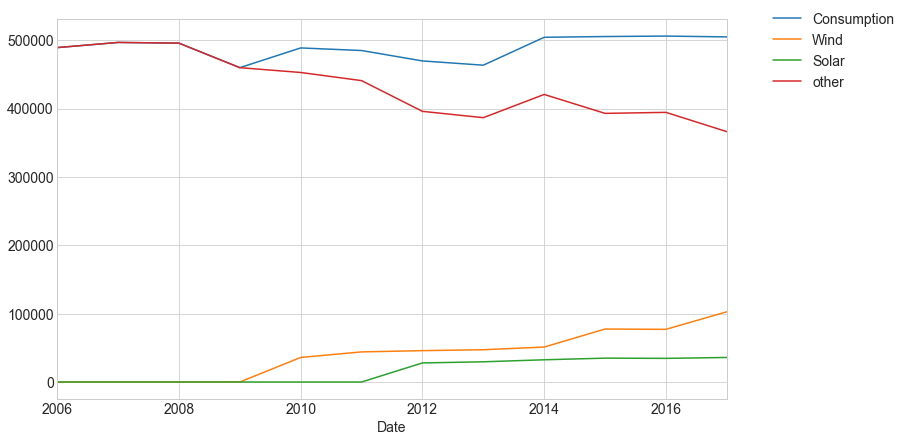

In [25]:
despark[['Consumption', 'Wind', 'Solar', 'other']].resample('Y').sum().plot()
plt.legend(bbox_to_anchor=(1.05, 1.05))

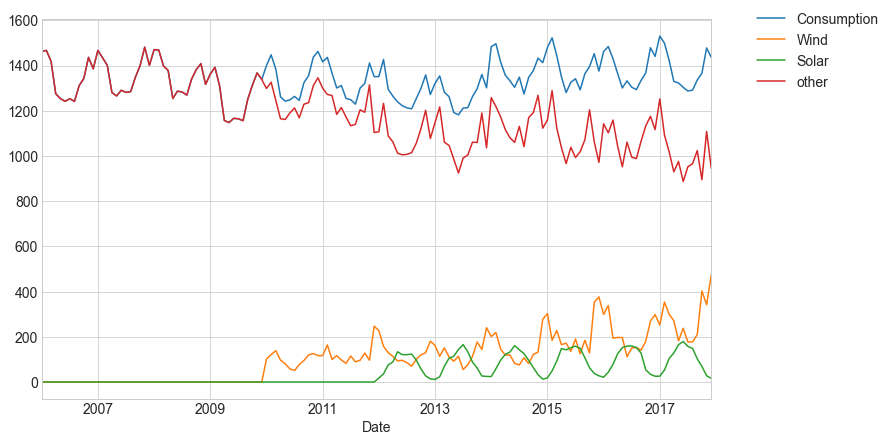

In [26]:
despark[['Consumption', 'Wind', 'Solar', 'other']].resample('M').mean().plot()
plt.legend(bbox_to_anchor=(1.05, 1.05))

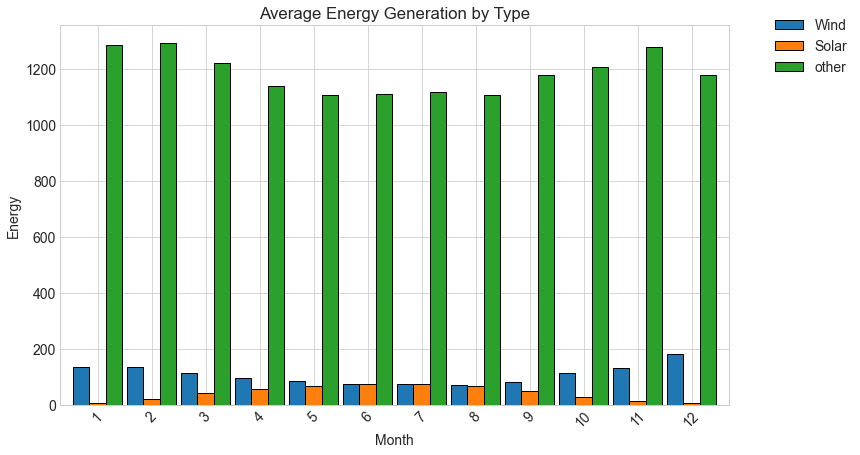

In [27]:
ax = despark[['Wind', 'Solar', 'other']].groupby(despark.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=45)
ax.set(title='Average Energy Generation by Type', xlabel='Month', ylabel='Energy')
plt.legend(bbox_to_anchor=(1.05, 1.05))

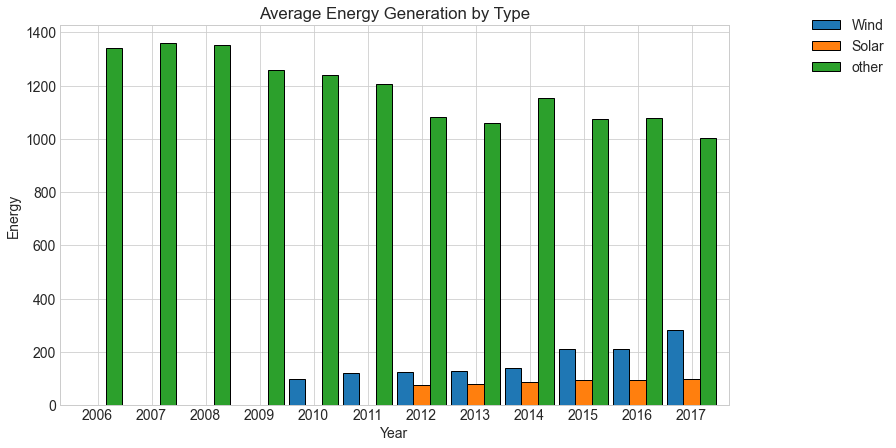

In [28]:
ax = despark[['Wind', 'Solar', 'other']].groupby(despark.index.year).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Energy Generation by Type', xlabel='Year', ylabel='Energy')
plt.legend(bbox_to_anchor=(1.25, 1.05))

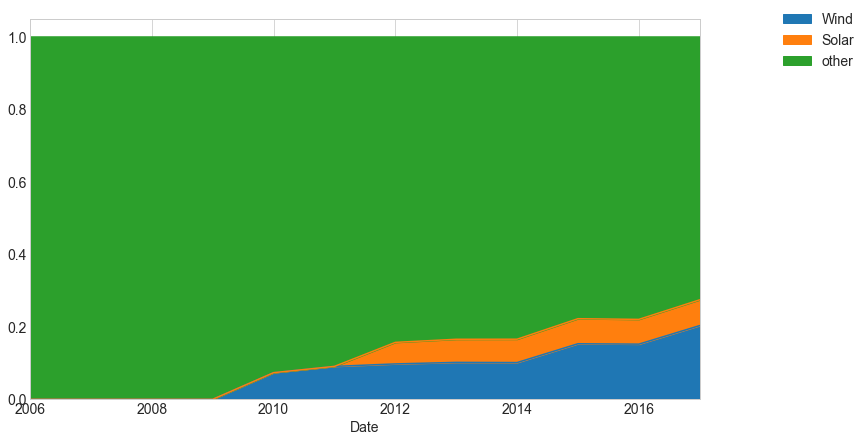

In [36]:
(despark[['Wind', 'Solar', 'other']]
 .resample('Y')
 .sum()
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.legend(bbox_to_anchor=(1.25, 1.05))